# Notebookを介したコミュニケーション

<img src="./images/literate_computing-logo.png" align="left" />

計算機インフラの御守では種々雑多なドキュメンテーションが不可欠です。日々の作業で証跡を残す、手順を整理して共有・再利用する、ユーザマニュアルや教材を整備する.. 国立情報学研究所（NII）のクラウド運用担当では、これらをシームレスに記述・蓄積する方法を研究しています。

このプロジェクト、Literate Computing for Reproducible Infrastructure（以下 「LC4RI」）では、インフラ運用の場面において [Jupyter Notebook]( http://jupyter.org ) を用いた **機械的に再現できる、人が読み解ける手順** を手段として、過度に自動化に依存することのない、レジリエントな **人間中心の機械化** をめざしています。そこでは、作業を効率化しつつもブラックボックス化せず、作業に対する理解をチーム内でコミュニケーションできる、また、目的と手段の整合性や限界を理解し議論・評価できると言った場を維持することで、ノウハウの移転・共有を促し運用者のスキル向上とエンジニアリングチームの再生産をはかることを目指しています。

これらを実現してゆくためには、運用作業者が自身の作成したNotebookを振り返ったり（過去の自分とのコミュニケーション）、別の運用作業者がより良い解を指摘したり（チーム内のコミュニケーション）することが重要になります。Notebookを介してこれらのコミュニケーションを円滑に行うために [`nblineage`](https://github.com/NII-cloud-operation/Jupyter-LC_nblineage)、[`sidestickies`](https://github.com/NII-cloud-operation/sidestickies)と言った機能を開発しています。

---
[**`nblineage`**](https://github.com/NII-cloud-operation/Jupyter-LC_nblineage): 
特定の作業に関する作業記録としてのNotebookは多くのコード、文章から成りたっています。`nblinage`はNotebookに含まれるコードや文章に対してCellの単位でユニークな `meme`(ミーム)ID を付与します。Notebookを流用するなどして複製されたCellは同一の `meme`ID を引き継ぐので、過去のNotebookを振り返ったり、派生したNotebook群を比較する際に各要素の流用や由来を追跡することができます。

[**`sidestickies`**](https://github.com/NII-cloud-operation/sidestickies):
通常のNotebookでもmarkdown中に色々なコメントや注釈を記述することができますが、`sidestickes(付箋機能)`ではCell（実際には`meme`ID）に対して`「付箋ページ」`を付与することができます。Notebookに記述しているストーリーとは異なる観点で、相互にコメントしたりヒントを与えたりするなどサイド・コミュニケーションに活用できます。また、付箋ページは`meme`IDに結びつけてあるので...由来が同じ、つまり同一の`meme`IDを持つCellは同一の付箋ページを参照します。例えば、複製して流用しているNotebookを用いた作業の途中に、そこでの気づきをコメントすると、関連するNotebookの読者にコメント内容を伝搬させることができます。流用元であった現在用いられていないNotebookを参照した場合や、共通起源から派生した他の場面で用いられているNotebookを参照した場合、由来が同じであるCellからは同じ付箋ページが参照されるので、Notebook群を横断したコミュニケーション手段として利用できます。Notebook群やNotebookを構成している要素間の関係性を把握し、効率よくメンテナンス・共有するために活用できます。

付箋ページの格納先には [**`Scrapbox`** `https://scrapbox.io/`](https://scrapbox.io/product/)の`page` を利用しています。


---
ここではNotebookを介してどのようなコミュニケーション行うことができるのかを紹介します。

# 説明・コードの追跡

運用作業を構成する手順には様々なものがあります。

* 障害発生時のログの取得
* バージョンアップ時の最新ソフトウェアの取得
* ...

いずれの操作も一回きりということはあまりなく、何かイベントが発生した際に繰り返し実施する性格の操作です。
そのため、状況により、あるいは操作対象となる個々のシステム毎に、手順がコピーされて再利用されることが多く発生します。

では、その操作に変更の必要性が出てきたらどのようにメンテナンスすれば良いでしょうか？対象システムのバージョンアップによりログファイルの
パスが変わった、アップデート方法が変わった、など... このような場合には、同じルーツを持つ説明・コード(Cell)に対して横断的にコメント等を付けられるようにすることで、複数存在するコピーに対するメンテナンスが容易になると考えられます。

このような、Cellのルーツを追跡する仕組みとして [**`nblineage`**](https://github.com/NII-cloud-operation/Jupyter-LC_nblineage) を、`nblineage`により同じルーツを持つと判断されるCellに横断的にコメント等を付加するツールとして [**`sidestickies`**](https://github.com/NII-cloud-operation/sidestickies) という付箋機能を開発しています。

# セルへコメントをつける

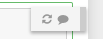 
`sidestickies`の機能を利用するには、ツールバーの <i class='fa fa-comments'></i> トグルボタンをクリックします。<br>
トグルをONにすると、Cell右端に`「付箋」:sidestickies`が表示されます。この付箋がCellに対する`付箋ページ`の入力欄です。

各Cellが作成、保存された時、`nblineage` によりそれぞれのCellに固有のIDが設定されます。Cellがコピーされると、このIDがそのまま引き継がれます。つまり、CellのルーツがこのIDで識別できるわけです。このIDを`nblineage`では`meme`(ミーム)と呼んでいます。
`sidestickies`は、この`meme`を手がかりに、[**`Scrapbox`**](https://scrapbox.io/product/)というサービス上に付箋ページを作ります。作成した付箋ページは **`Scrapbox`** の機能を利用して編集したり、検索したりできます。

試しに、以下のセルの右側にある付箋右端の <i class="fa fa-comments"></i> をクリックしてみてください。Scrapboxのウインドウが開き、Cellの `meme` IDに対応する付箋ページの編集欄が表示されます。



In [1]:
print('Hello!')

Hello!


> <span style='background-color:mistyrose;'>本デモ環境で、付箋ページの内容を変更するためには Scrapbox https://scrapbox.io/sidestickies-public/ に対する編集権限が必要です。実際に編集してみたい場合は、クラウド運用チームにお問い合せください(メールアドレスはイベント会場にてお伝えしています)。</span>

`Scrapbox` の編集権限がある場合、編集欄でページの内容、タイトルを変更することができます。<br>
変更した場合は、付箋左端の更新ボタン<i class='fa fa-refresh'></i> を押してみてください。最新のコメントを取得することができます。

次に、現在のNotebookを複製してみましょう。 メニューバーから.. "File" >> "Make a Copy.." を選択してください。<br>
現在在開いているのと同じNotebookのコピーが表示されます。<br>
未だ、付箋ページが存在しない Cell の付箋から右端の <i class="fa fa-comment" style='color:#cccccc;'></i> をクリックすると付箋ページの編集欄が表示されます。タイトル等入力してみましょう。<br><br>
入力後、コピー元のNotebookに戻って、対応するCellの付箋を確認すると、新たに入力した付箋ページのタイトルや内容が伝搬して表示されるのを確認できます。


# まとめ

Notebookのコピーが増えてきた場合でも、横断的にコメントを付加できるようにすること、またコメント内容の検索や整理に Scrapboxを利用できるようにすることなど、Notebook群の管理の助けとなるような機能を開発しています。